In [1]:
# Make sure you have these dependencies available
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. We first download data on TESSCut FFI Cutouts

For this tutorial we will use the TESS images from sector 1. We will request the 
cutout of a star that has been found to have two orbiting planets. The size of each
stamp is 50x50 in this case.

We data being downloaded is first download the FFI data. This is done


In [2]:
target = 'TOI216'  # TOI 216 Star
tpf = lk.search_tesscut(target, sector=1).download(cutout_size=(50, 50))

In [3]:
# These TESS cut objects provide tons of capabilities. In particular, one can see the
# animation of such data...
tpf.animate()

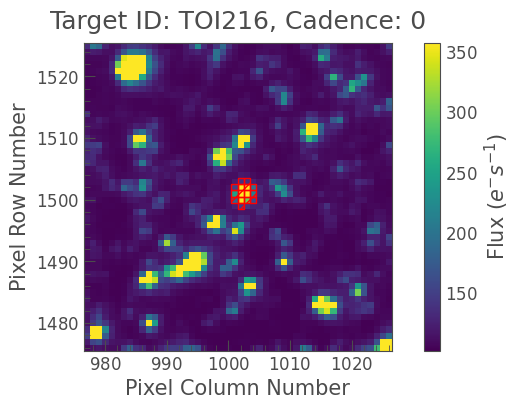

In [17]:
# Now we must create a mask for that star. This is the
aper = tpf.create_threshold_mask()
# And see what it looks like
tpf.plot(aperture_mask=aper);

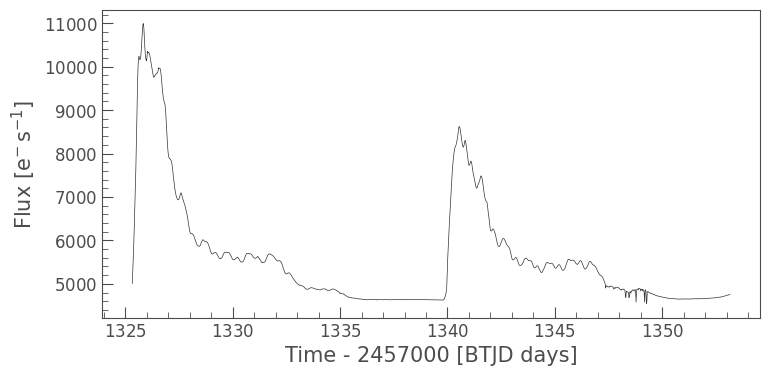

In [5]:
# Now we sum all those pixels
uncorrected_lc = tpf.to_lightcurve(aperture_mask=aper)
uncorrected_lc.plot();

This is clearly the effect of scattered light from the Moon or the Earth on our lightcurve.
We run the regression

In linear regression problems, it is common to refer to the matrix of regressors as the design matrix (also known as model matrix or regressor matrix). Lightkurve provides a convenient `DesignMatrix` class which is designed to help you work with detrending vectors. 


In [6]:
# Make a design matrix and pass it to a linear regression corrector
dm = lk.DesignMatrix(tpf.flux[:, ~aper], name='regressors').pca(5).append_constant()
rc = lk.RegressionCorrector(uncorrected_lc)
corrected_ffi_lc = rc.correct(dm)

# Optional: Remove the scattered light, allowing for the large offset from scattered light
corrected_ffi_lc = uncorrected_lc - rc.model_lc + np.percentile(rc.model_lc.flux, 5)

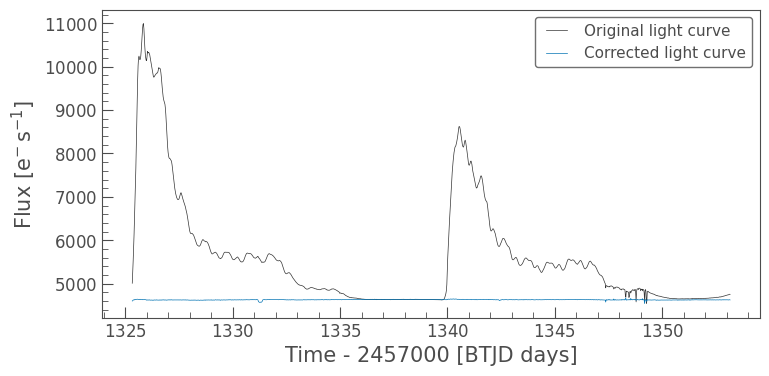

In [8]:
%matplotlib inline
ax = uncorrected_lc.plot(label='Original light curve')
corrected_ffi_lc.plot(ax=ax, label='Corrected light curve');

In [16]:
regressors = tpf.flux[:, ~aper]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 50 but corresponding boolean dimension is 11

In [10]:
# Download a 2-minute cadence Target Pixel File (TPF)
tpf_2min = lk.search_targetpixelfile(target, mission='TESS', sector=1).download()

/Users/cfuentes/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:423: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [11]:
# Use the pipeline aperture and an uncorrected light curve
aper = tpf_2min.pipeline_mask
twomin_lc = tpf_2min.to_lightcurve()


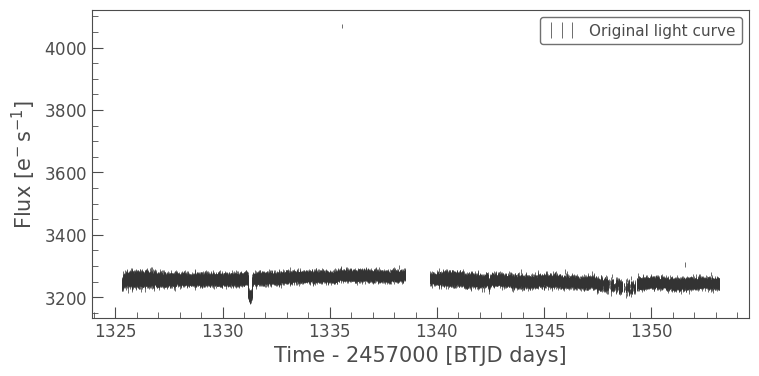

In [12]:
ax = twomin_lc.errorbar(label='Original light curve')

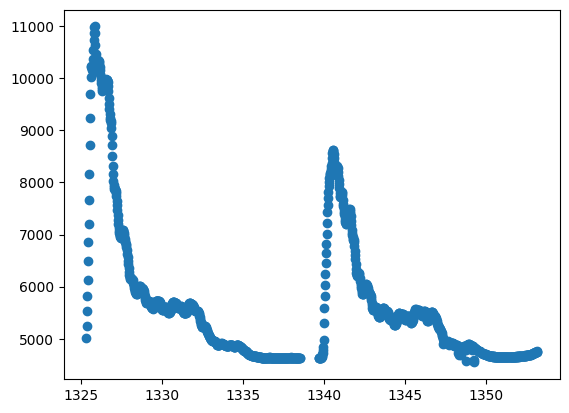

In [14]:
%matplotlib inline
plt.scatter(uncorrected_lc['time'].btjd, uncorrected_lc['flux'])

In [18]:
# https://github.com/spacetelescope/mast_notebooks/blob/main/notebooks/TESS/removing_scattered_light_using_regression/removing_scattered_light_using_regression.ipynb